### TIme Series Econometrics 2023

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Change the current working directory
os.chdir('D:/Documents/2022-2023 school year/TimeSeries2023/Seminars/Лаба2')
os.getcwd()

'D:\\Documents\\2022-2023 school year\\TimeSeries2023\\Seminars\\Лаба2'

### Данные
Взять цену одной из российских акций из файла Russtockdaily либо один из фондовых индексов из файла WorldIndDaily

In [95]:
df = pd.read_csv('Russtockdaily.txt', sep="\t", header=None)
df = df[[0,29]].iloc[1:]
df

,0,29
1,05.01.1999,NaN
2,06.01.1999,NaN
3,10.01.1999,NaN
4,11.01.1999,NaN
5,12.01.1999,NaN
...,...,...
4437,19.10.2016,"120,22"
4438,20.10.2016,124
4439,21.10.2016,"126,69"
4440,24.10.2016,"129,99"


In [96]:
df[29] = df[29].str.replace(',','.')
df[29] = df[29].astype(float)
df['stock'] = np.log(df[29])
df = df.dropna()
df

,0,29,stock
151,11.08.1999,4.00,1.386294
152,12.08.1999,4.00,1.386294
153,13.08.1999,4.00,1.386294
154,16.08.1999,4.00,1.386294
155,17.08.1999,4.00,1.386294
...,...,...,...
4437,19.10.2016,120.22,4.789323
4438,20.10.2016,124.00,4.820282
4439,21.10.2016,126.69,4.841743
4440,24.10.2016,129.99,4.867458


### Задание 1
Для выбранной акции (или индекса) сравнить между собой различные спецификации моделей волатильности (GARCH, IGARCH, EGARCH, TGARCH, GARCH-M, число параметров не более 4-6) на основе:  
а. отсутствия автокорреляции в остатках и квадрате остатков,  
б. минимуме информационных критериев,  
в. экономии параметров.

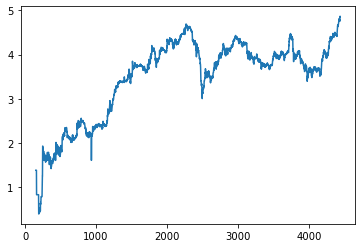

In [97]:
# Visualize
plt.plot(df['stock'])

C:\Users\Alex\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


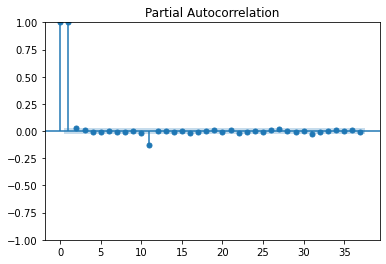

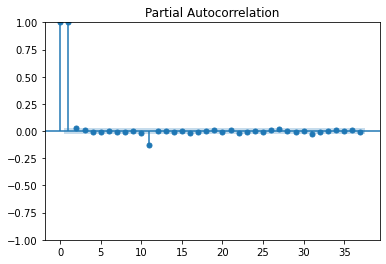

In [98]:
# PACF
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['stock'])

TypeError: 'Figure' object is not subscriptable

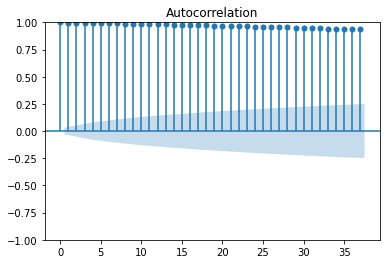

In [99]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['stock'])[0]

In [101]:
# DF test
from statsmodels.tsa.stattools import adfuller

#perform augmented Dickey-Fuller test
adfuller(df['stock'],regression='ct')

(-2.005162332999438,
 0.5986187901657161,
 4,
 4286,
 {'1%': -3.9608837984276333,
  '5%': -3.4115148508468227,
  '10%': -3.1276534803991103},
 -17625.476063416616)

In [111]:
df['stock'].iloc[1:]

152     1.386294
153     1.386294
154     1.386294
155     1.386294
156     1.386294
          ...   
4437    4.789323
4438    4.820282
4439    4.841743
4440    4.867458
4441    4.857251
Name: stock, Length: 4290, dtype: float64

In [117]:
df['dif'] = 0

C:\Users\Alex\AppData\Local\Temp\ipykernel_9884\1797835158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dif'] = 0


In [118]:
df['dif'].iloc[1:] = np.diff(df['stock'])

C:\Users\Alex\AppData\Local\Temp\ipykernel_9884\607193261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dif'].iloc[1:] = np.diff(df['stock'])


In [119]:
4.820282 - 4.789323

0.030958999999999293

In [120]:
df

,0,29,stock,dif
151,11.08.1999,4.00,1.386294,0.000000
152,12.08.1999,4.00,1.386294,0.000000
153,13.08.1999,4.00,1.386294,0.000000
154,16.08.1999,4.00,1.386294,0.000000
155,17.08.1999,4.00,1.386294,0.000000
...,...,...,...,...
4437,19.10.2016,120.22,4.789323,0.018046
4438,20.10.2016,124.00,4.820282,0.030958
4439,21.10.2016,126.69,4.841743,0.021462
4440,24.10.2016,129.99,4.867458,0.025714


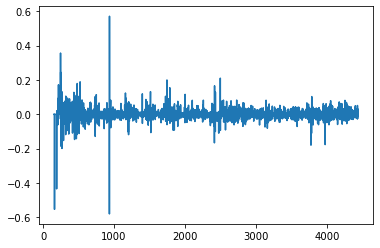

In [125]:
plt.plot(df['dif'])

C:\Users\Alex\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


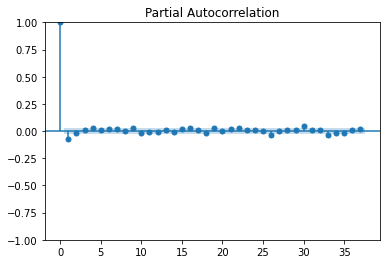

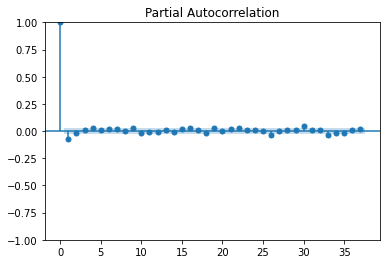

In [122]:
# PACF
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['dif'])

TypeError: 'Figure' object is not subscriptable

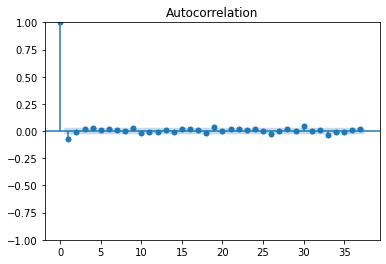

In [124]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['dif'])[0]

In [139]:
adfuller(df['dif'],maxlag=1)

(-70.3209625360256,
 0.0,
 0,
 4290,
 {'1%': -3.4318752254397578,
  '5%': -2.862213960168296,
  '10%': -2.5671287540276353},
 -17453.883966656085)

In [161]:
from statsmodels.tsa.arima.model import ARIMA
arma = ARIMA(df['dif'], order=(0, 0, 1)).fit()
print(arma.params)

C:\Users\Alex\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Alex\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Alex\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


const     0.000806
ma.L1    -0.071928
sigma2    0.000999
dtype: float64


In [166]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(arma.resid, lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,6.099028,0.296702


In [169]:
pip install pyflux

  Running setup.py clean for pyflux
Failed to build pyflux
    Running setup.py install for pyflux: started
    Running setup.py install for pyflux: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Alex\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Alex\\AppData\\Local\\Temp\\pip-install-s9reatmu\\pyflux_8979561386f847b6850ea17111bd4f61\\setup.py'"'"'; __file__='"'"'C:\\Users\\Alex\\AppData\\Local\\Temp\\pip-install-s9reatmu\\pyflux_8979561386f847b6850ea17111bd4f61\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Alex\AppData\Local\Temp\pip-wheel-gi20d5sg'
       cwd: C:\Users\Alex\AppData\Local\Temp\pip-install-s9reatmu\pyflux_8979561386f847b6850ea17111bd4f61\
  Complete output (142 lines):
  running bdist_wheel
  running build
  running config_cc
  unifing config_cc, config, build_clib, build_ext, build comma

  copying pyflux\ssm\dynamic_glm.py -> build\lib.win-amd64-3.9\pyflux\ssm
  copying pyflux\ssm\dynlin.py -> build\lib.win-amd64-3.9\pyflux\ssm
  copying pyflux\ssm\llm.py -> build\lib.win-amd64-3.9\pyflux\ssm
  copying pyflux\ssm\llt.py -> build\lib.win-amd64-3.9\pyflux\ssm
  copying pyflux\ssm\local_level.py -> build\lib.win-amd64-3.9\pyflux\ssm
  copying pyflux\ssm\local_trend.py -> build\lib.win-amd64-3.9\pyflux\ssm
  copying pyflux\ssm\ndynlin.py -> build\lib.win-amd64-3.9\pyflux\ssm
  copying pyflux\ssm\nllm.py -> build\lib.win-amd64-3.9\pyflux\ssm
  copying pyflux\ssm\nllt.py -> build\lib.win-amd64-3.9\pyflux\ssm
  copying pyflux\ssm\setup.py -> build\lib.win-amd64-3.9\pyflux\ssm
  copying pyflux\ssm\__init__.py -> build\lib.win-amd64-3.9\pyflux\ssm
  creating build\lib.win-amd64-3.9\pyflux\tests
  copying pyflux\tests\nhst.py -> build\lib.win-amd64-3.9\pyflux\tests
  copying pyflux\tests\__init__.py -> build\lib.win-amd64-3.9\pyflux\tests
  creating build\lib.win-amd64-3.9\pyflu

In [170]:
import pyflux as pf
model = pf.GARCH(df['dif'],p=1,q=1)
x = model.fit()
x.summary()

ModuleNotFoundError: No module named 'pyflux'

In [144]:
0.87*(7800/11)/9

68.54545454545455

In [ ]:
4*x1 + 2*x2 + 4*x3 + x4 = 7.8
x2 = 0.8*x1
x3 = 0.6*x1
x4 = 0.5*x1

In [155]:
A = np.array([[4,2,4,1],[0.8,-1,0,0],[0.6,0,-1,0],[0.5,0,0,-1]])
b = np.array([[7.8,0,0,0]]).T
A

array([[ 4. ,  2. ,  4. ,  1. ],
       [ 0.8, -1. ,  0. ,  0. ],
       [ 0.6,  0. , -1. ,  0. ],
       [ 0.5,  0. ,  0. , -1. ]])

In [156]:
np.linalg.solve(A,b)

array([[0.91764706],
       [0.73411765],
       [0.55058824],
       [0.45882353]])

In [157]:
0.91764706*4 + 0.73411765*2 + 0.55058824*4 + 0.45882353

7.80000003

In [159]:
0.87*0.91764706*1000000/9

88705.88246666666